In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


**Load the Data**

In [10]:
X = np.load("../data/dimensionality_reduction/data.npy")
y = np.load("../data/dimensionality_reduction/labels.npy")

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Reduction of Dimention**

In [11]:
# PCA 2D
X_pca2 = PCA(n_components=2).fit_transform(X_scaled)
# PCA 3D
X_pca3 = PCA(n_components=3).fit_transform(X_scaled)
# t-SNE 2D
X_tsne2 = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
# t-SNE 3D
X_tsne3 = TSNE(n_components=3, random_state=42).fit_transform(X_scaled)


**2D Visualisation**

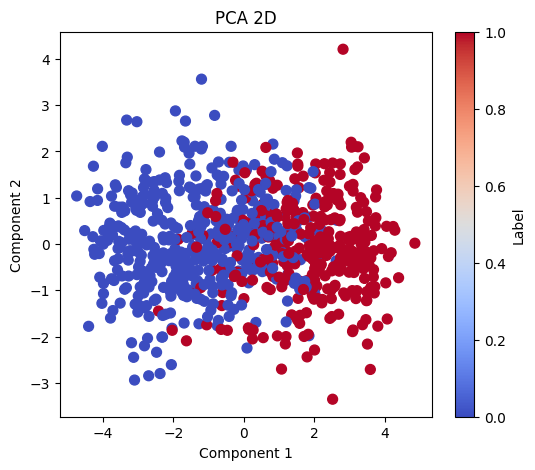

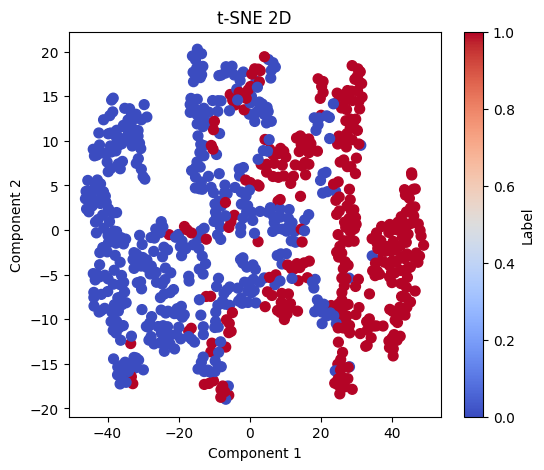

In [12]:
def plot_2D(X_red, y, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X_red[:,0], X_red[:,1], c=y, cmap="coolwarm", s=50)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.colorbar(label="Label")
    plt.show()

plot_2D(X_pca2, y, "PCA 2D")
plot_2D(X_tsne2, y, "t-SNE 2D")



**3D Visualisation**

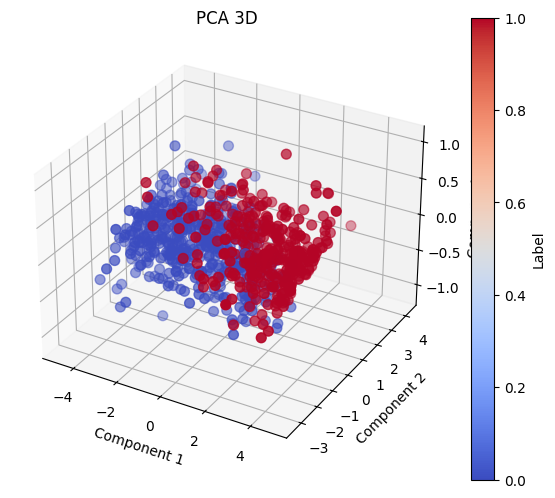

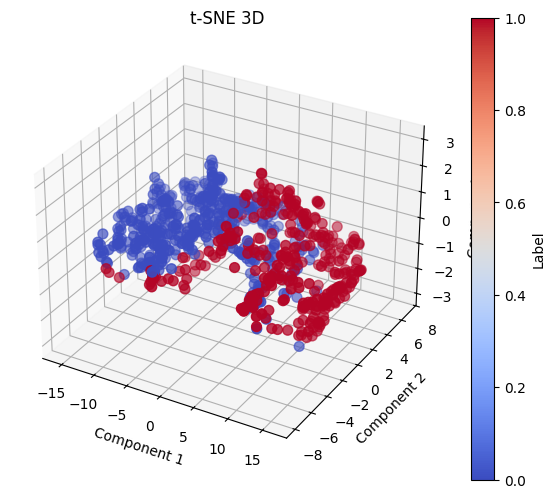

In [13]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3D(X_red, y, title):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X_red[:,0], X_red[:,1], X_red[:,2], c=y, cmap="coolwarm", s=50)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.title(title)
    plt.colorbar(sc, label="Label")
    plt.show()

plot_3D(X_pca3, y, "PCA 3D")
plot_3D(X_tsne3, y, "t-SNE 3D")

**Classifier on the reduced data (example with 2D PCA)**

In [15]:
# Convertir y en float32 pour Keras
y = y.astype("float32")

model = Sequential([
    Dense(16, activation="relu", input_shape=(2,)),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")  # classification binaire
])

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(X_pca2, y, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

# Évaluation
loss, acc = model.evaluate(X_pca2, y)
print(f"Accuracy on PCA 2D data: {acc:.4f}")

C:\Users\kenti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8436 - loss: 0.3260
Accuracy on PCA 2D data: 0.8450
